In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Algorithm

#### TEST examples of data:

In [4]:
exampn0 = [[3,8],[10,5],[8,10],[8,11],[10,13],[9,14],[6,15],[15,15],[3,10],[3,12],[1,1],[2,2],[3,3],[4,4]]
exampn1 = [[3,8],[10,5],[8,10],[8,11],[10,13],[9,14],[6,15],[15,15],[3,10],[3,12],[10,10]]
exampn2 = [[1,1],[2,2],[3,3],[4,4],[2,3],[2,4],[2,5],[2.5,4,5]]
exampn3 = [[1,1],[2,2],[3,3],[4,4]]
exampn4 = [[2,3],[2,4],[2,5],[2,8]]

## Functions:

In [4]:
# Function return: list with num -number of points
def ran_set(num):
    exam_list =[]
    for j in range(num):
        l = [random.randint(0,10) for i in range(2)]
        exam_list.append(l)
    return exam_list       

In [5]:
#Function return scatter plot of list of points
def point_vis(exam):
    x_scat = []
    y_scat = []
    for i in range(len(exam)):
          x_scat.append(exam[i][0])
          y_scat.append(exam[i][1])        
    plt.scatter(x_scat, y_scat)    

In [6]:
# function takes: list op points and size of desirable number of points in line.
#return list of lines
def find_lines(list_of_points, segment_size):     
    points_list = list_of_points
    size = segment_size
    list_of_lines = []
    #we iterate over all points except last two(minimum size of segment 3 points)
    for i in range(len(points_list)-2):
        x0, y0 = points_list[i][0], points_list[i][1]
        lines = []
        horiz_line = [(x0,y0)] 
        vertical_line = [(x0,y0)]
        for k in range(len(points_list)):
            x1, y1 = points_list[k][0], points_list[k][1]
            if (x0,y0) != (x1,y1):
                if x1 ==x0:
                    vertical_line.append((x1,y1))     
                elif y1 == y0:
                    horiz_line.append((x1,y1))
                else:
                    a1 = (y1-y0)/(x1-x0)
                    line = [(x0,y0),(x1,y1)]
                    for l in range(len(points_list)):
                        x2,y2 = points_list[l][0], points_list[l][1]
                        if x2 != x0 and (x0,y0) !=(x2,y2)and(x1,y1)!=(x2,y2):
                            a2 = (y2-y0)/(x2-x0)
                            if a1 == a2:
                                line.append((x2,y2))
                    line.sort()
                    line = tuple(set(tuple(line)))
                    if len(line) >=size:
                        lines.append(line)
        horiz_line.sort()
        horiz_line = tuple(set(tuple(horiz_line)))
        if len(horiz_line)>=size:
            list_of_lines.append(horiz_line)
        vertical_line.sort()
        vertical_line = tuple(set(tuple(vertical_line)))
        if len(vertical_line)>=size:
            list_of_lines.append(vertical_line)
        if len(lines) >=1:      
            list_of_lines= list_of_lines + lines
            
    list_of_lines = set(tuple(list_of_lines))
    return list(list_of_lines)  

In [7]:
#Function takes: points- list of points, segment -list of lines.
#return plot of scatter with lines
def lines_plot(points, segment):
    x_scat = []
    y_scat = []
    for i in range(len(points)):
          x_scat.append(points[i][0])
          y_scat.append(points[i][1])        
    plt.scatter(x_scat, y_scat)
    
    for j in range(len(segment)):
        x_plt = []
        y_plt = []
        for i in range(len(segment[j])):
            x_plt.append(segment[j][i][0])
            y_plt.append(segment[j][i][1])
        plt.plot(x_plt, y_plt)   

### example 00

In [8]:
example00 =[[9, 2],[3, 2],[8, 9],[9, 4],[7, 4],[7, 0],[4, 10],[9, 10],[10, 7],[7, 7],
 [7, 3],[6, 9],[2, 7],[8, 1],[2, 0],[4, 10],[1, 5],[7, 2],[0, 3],[9, 1],[8, 4]]
len(example00)

21

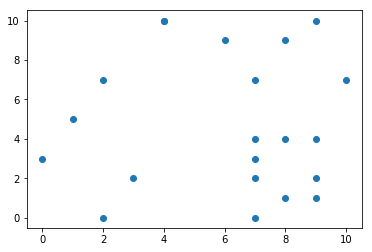

In [9]:
# list of points
point_vis(example00)

In [11]:
#find all lines with minimum size of 4
num_segments = find_lines(example00, 4)
num_segments

[((9, 2), (9, 1), (9, 4), (9, 10)), ((7, 3), (7, 0), (7, 7), (7, 4), (7, 2))]

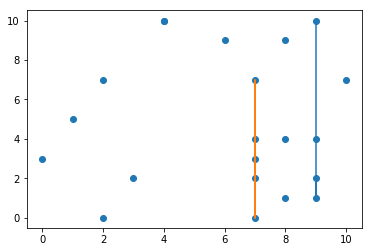

In [12]:
#plot points and lines
lines_plot(example00, num_segments)

### random set example

In [13]:
# generate list of lines of desired size
example = ran_set(21)

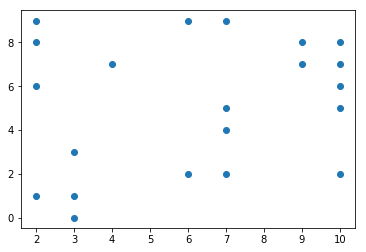

In [14]:
# list of points
point_vis(example)

In [21]:
#find all lines with minimum size of any number (>=3 acceptable)
num_segment = find_lines(example, 4)
num_segment

[((10, 8), (7, 5), (3, 1), (9, 7)),
 ((2, 8), (2, 6), (2, 9), (2, 1)),
 ((10, 8), (10, 5), (10, 7), (10, 6), (10, 2)),
 ((7, 4), (7, 5), (7, 2), (7, 9))]

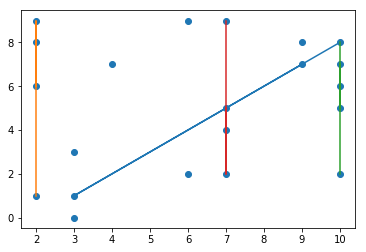

In [22]:
#plot points and lines
lines_plot(example, num_segment)